In [1]:
import csv
import numpy as np
import pandas as pd
from numpy.random import RandomState
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
#from sklearn.metrics import zero_one_score
import pydot_ng
import operator

c:\program files\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\program files\python35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\program files\python35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning

In [2]:
#read data from csv file
data = []

    # Read the training data
f = open('recon/spambase.data')
reader = csv.reader(f)
next(reader, None)
for row in reader:
    data.append(row)
f.close()

In [3]:
#print(data)


In [4]:
#split the dataset input and outputs
X = np.array([x[:-1] for x in data]).astype(np.float)
y = np.array([x[-1] for x in data]).astype(np.float)
result_table=pd.DataFrame(columns=["False Negative","False Positive","error_rate"])

In [5]:
#print(X)

Train: [   0    1    2 ... 4596 4598 4599] Validation: [  13   17   21   28   32   40   44   62   82   90   94   98   99  100
  102  107  108  120  123  133  134  136  157  161  165  169  190  196
  200  219  222  230  250  285  299  324  329  330  331  343  349  358
  359  364  366  372  394  407  440  447  486  494  544  552  553  555
  560  566  573  574  579  589  592  599  608  610  662  684  700  703
  718  724  748  749  756  757  758  761  763  769  771  772  778  783
  795  804  808  840  874  880  893  899  901  909  910  932  943  959
  960  994  998 1004 1008 1011 1016 1034 1038 1043 1044 1050 1064 1073
 1080 1094 1098 1105 1113 1122 1123 1141 1156 1159 1163 1179 1195 1213
 1217 1230 1232 1238 1246 1247 1249 1253 1264 1273 1291 1296 1297 1321
 1342 1351 1355 1381 1385 1396 1399 1403 1404 1406 1410 1417 1426 1427
 1435 1453 1477 1504 1519 1524 1526 1533 1550 1554 1560 1573 1577 1604
 1630 1637 1641 1648 1653 1660 1672 1687 1723 1725 1734 1736 1749 1772
 1773 1807 1822 1828 1

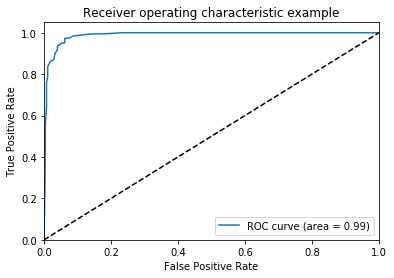

Train: [   0    2    3 ... 4597 4598 4599] Validation: [   1    6   12   19   37   45   58   79   93  111  115  126  128  181
  187  188  191  194  203  205  210  216  224  233  236  246  256  268
  275  280  290  292  301  306  313  314  316  345  368  385  389  393
  418  420  428  438  443  453  457  495  501  518  524  534  556  557
  561  563  577  587  607  613  632  636  644  645  650  657  661  671
  678  685  695  729  745  779  784  785  787  792  823  834  836  846
  854  870  881  891  895  906  913  921  931  940  941  955  957  965
  987  988  993  996 1020 1021 1042 1049 1055 1060 1061 1063 1081 1117
 1125 1126 1128 1140 1143 1147 1155 1162 1169 1206 1225 1227 1233 1236
 1237 1268 1272 1333 1344 1352 1375 1379 1395 1412 1413 1414 1419 1433
 1441 1447 1448 1459 1475 1488 1495 1508 1520 1563 1579 1596 1603 1614
 1615 1666 1678 1683 1684 1690 1692 1697 1702 1715 1720 1721 1729 1740
 1751 1752 1765 1785 1794 1814 1823 1827 1833 1854 1856 1863 1875 1884
 1885 1893 1906 1922 1

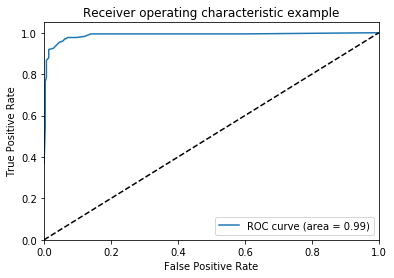

Train: [   0    1    2 ... 4597 4598 4599] Validation: [   3    7   47   50   72   75   83   89  104  110  119  154  171  177
  186  197  201  225  231  254  255  262  297  302  309  318  321  325
  332  338  342  351  362  367  382  383  386  397  398  399  403  416
  421  427  435  442  456  464  473  476  480  481  484  487  490  498
  517  525  527  541  546  551  558  564  580  588  598  605  630  664
  666  693  701  705  709  710  711  716  719  726  739  773  781  788
  790  791  794  796  799  813  817  829  845  850  855  857  902  918
  929  936  945  953  963  968  984  986  990 1006 1012 1028 1030 1071
 1077 1078 1087 1089 1099 1102 1103 1104 1120 1131 1132 1138 1144 1171
 1176 1177 1185 1216 1235 1248 1281 1299 1328 1329 1334 1364 1373 1380
 1392 1424 1432 1438 1457 1494 1499 1501 1513 1518 1523 1528 1537 1540
 1542 1545 1548 1549 1561 1564 1565 1584 1608 1624 1626 1642 1669 1674
 1680 1686 1703 1759 1771 1780 1781 1783 1784 1787 1791 1796 1801 1802
 1810 1825 1832 1837 1

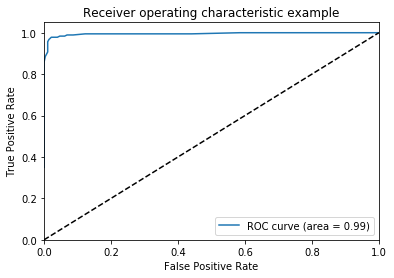

Train: [   0    1    2 ... 4597 4598 4599] Validation: [   4   10   11   34   41   60   65   87  125  130  137  151  172  180
  192  195  220  223  228  232  248  267  282  289  291  305  335  340
  346  348  357  376  396  414  415  434  439  448  460  462  471  503
  506  508  516  521  535  539  540  543  547  559  569  572  581  582
  583  586  595  600  615  616  623  642  687  689  702  706  707  713
  720  725  730  734  747  751  770  797  802  812  822  839  856  872
  876  882  885  898  911  917  924  925  933  946  958  973  975  982
  985 1010 1013 1017 1024 1026 1032 1035 1036 1039 1040 1047 1065 1070
 1074 1082 1093 1100 1114 1135 1142 1145 1149 1151 1164 1165 1167 1173
 1189 1201 1208 1219 1231 1239 1255 1263 1277 1288 1300 1301 1309 1322
 1330 1335 1336 1338 1366 1377 1386 1391 1398 1400 1402 1409 1420 1430
 1456 1463 1466 1497 1498 1503 1507 1521 1525 1534 1535 1546 1556 1559
 1562 1578 1586 1587 1610 1620 1621 1625 1635 1647 1649 1650 1651 1652
 1657 1670 1673 1675 1

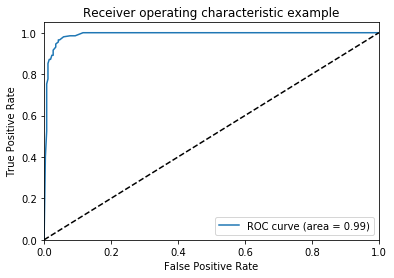

Train: [   0    1    2 ... 4595 4596 4597] Validation: [  39   54   56   68   81   86   91  101  103  122  138  146  166  199
  204  206  208  218  221  227  241  258  260  270  273  283  287  303
  304  337  341  344  347  363  365  370  406  422  425  429  432  436
  445  468  470  477  485  499  509  510  520  533  536  549  571  576
  584  602  614  620  627  635  643  654  670  674  675  679  681  683
  688  691  697  733  735  764  774  777  793  816  825  828  858  866
  871  883  896  916  926  927  947  954  970  979  981 1000 1002 1041
 1045 1051 1091 1096 1097 1107 1129 1153 1178 1193 1194 1196 1197 1210
 1215 1220 1221 1223 1241 1261 1265 1266 1270 1271 1293 1305 1307 1316
 1347 1349 1359 1363 1365 1376 1387 1401 1408 1421 1422 1425 1445 1451
 1452 1468 1489 1496 1502 1506 1536 1544 1551 1552 1555 1566 1569 1571
 1581 1592 1595 1597 1607 1613 1631 1636 1644 1658 1661 1688 1696 1698
 1708 1730 1732 1737 1754 1760 1766 1767 1782 1789 1805 1808 1813 1815
 1819 1840 1862 1895 1

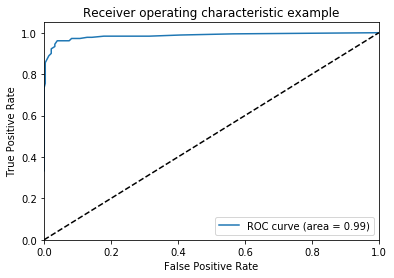

Train: [   0    1    2 ... 4597 4598 4599] Validation: [   8   16   23   24   30   35   36   38   48   64   66   76  113  124
  129  132  140  148  173  182  189  198  202  207  212  217  226  229
  240  242  257  261  272  288  293  336  350  353  361  375  390  400
  401  441  444  446  452  459  465  469  478  492  493  514  526  537
  578  585  590  612  621  628  631  638  639  640  653  655  660  669
  676  680  692  698  708  712  736  737  743  760  767  768  800  807
  820  849  851  852  859  864  877  894  900  919  934  935  937  961
  972  983  992  997  999 1001 1009 1015 1019 1027 1053 1058 1066 1068
 1069 1072 1083 1108 1112 1118 1136 1152 1186 1188 1205 1218 1224 1226
 1228 1234 1260 1278 1282 1285 1287 1292 1294 1308 1325 1327 1339 1353
 1357 1382 1383 1384 1388 1394 1407 1415 1434 1436 1443 1446 1450 1454
 1467 1469 1470 1471 1481 1483 1484 1490 1509 1515 1517 1532 1539 1575
 1588 1589 1593 1598 1605 1606 1609 1611 1617 1623 1628 1654 1659 1663
 1668 1695 1701 1713 1

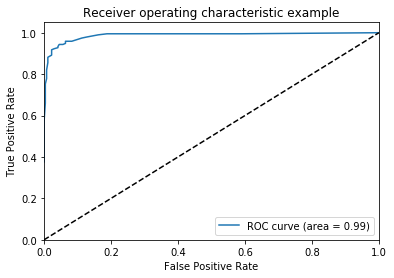

Train: [   1    2    3 ... 4597 4598 4599] Validation: [   0   22   49   51   53   59   67   73   80   92  112  139  142  149
  158  160  163  167  168  176  184  209  214  259  264  266  277  281
  286  294  323  352  356  369  380  384  388  408  413  419  424  451
  488  507  512  513  515  523  529  531  532  575  596  604  611  619
  622  625  634  641  667  672  750  754  766  786  801  805  809  815
  821  853  861  887  888  904  920  948  952  976  977  980  995 1005
 1037 1054 1059 1075 1084 1085 1086 1109 1115 1124 1139 1146 1148 1157
 1161 1168 1172 1181 1183 1192 1204 1212 1244 1245 1252 1262 1269 1274
 1276 1279 1283 1286 1289 1290 1310 1313 1317 1323 1326 1331 1343 1348
 1354 1362 1369 1378 1397 1405 1442 1460 1461 1462 1480 1482 1487 1493
 1500 1514 1529 1541 1558 1570 1574 1576 1585 1599 1601 1629 1645 1646
 1655 1664 1671 1681 1691 1699 1705 1726 1753 1761 1770 1790 1812 1818
 1831 1842 1853 1855 1864 1866 1872 1894 1908 1932 1934 1935 1936 1955
 1970 2001 2034 2035 2

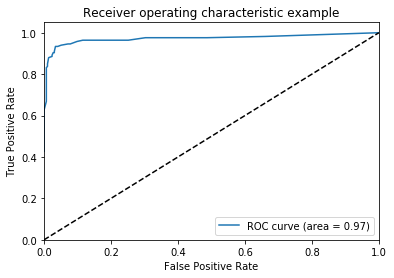

Train: [   0    1    3 ... 4597 4598 4599] Validation: [   2    9   26   27   29   33   46   74   78   85   88  106  116  131
  135  147  156  159  175  185  211  215  234  239  244  247  249  251
  274  278  279  295  298  308  310  311  315  355  371  392  395  404
  409  426  430  437  474  491  496  500  502  522  528  538  554  567
  570  593  594  597  618  629  633  647  649  656  659  663  682  714
  717  722  723  727  740  742  746  759  762  789  810  819  824  827
  831  833  835  844  847  848  860  862  863  868  890  908  912  914
  922  923  938  949  950  951  962  964  966  969  971  974  989  991
 1014 1048 1056 1057 1079 1090 1101 1116 1121 1130 1134 1154 1166 1180
 1203 1209 1211 1222 1229 1240 1243 1258 1298 1304 1314 1315 1318 1320
 1346 1358 1367 1370 1374 1393 1416 1418 1428 1429 1476 1505 1511 1512
 1538 1553 1583 1600 1618 1619 1634 1656 1662 1682 1709 1711 1731 1733
 1743 1746 1755 1757 1764 1774 1779 1788 1800 1811 1830 1841 1843 1861
 1877 1886 1923 1940 1

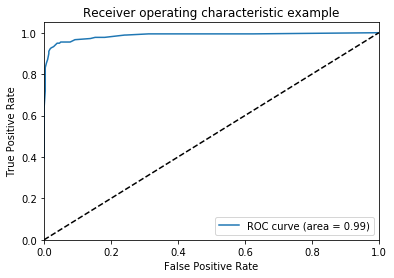

Train: [   0    1    2 ... 4597 4598 4599] Validation: [   5   18   25   31   43   55   57   61   69   77   84   95   97  114
  117  118  121  127  141  162  164  170  178  179  193  237  238  245
  263  265  276  284  300  307  320  322  326  328  339  354  360  374
  381  387  411  433  449  455  458  463  466  472  479  482  483  504
  511  530  545  548  550  568  603  646  665  673  686  694  699  731
  741  744  752  755  765  775  776  780  782  798  826  830  841  842
  865  867  875  879  892  930  942  978 1003 1007 1022 1023 1025 1029
 1062 1076 1092 1119 1127 1158 1160 1175 1184 1190 1198 1199 1242 1250
 1256 1257 1259 1267 1275 1280 1284 1302 1319 1332 1340 1341 1356 1361
 1371 1390 1411 1431 1437 1439 1440 1444 1449 1458 1464 1479 1492 1510
 1516 1530 1531 1543 1557 1567 1568 1591 1602 1633 1643 1665 1676 1689
 1704 1714 1718 1750 1769 1775 1786 1793 1797 1809 1821 1839 1867 1868
 1889 1890 1901 1904 1910 1912 1948 1952 1954 1963 1969 1971 1975 1981
 1985 1989 1997 1998 2

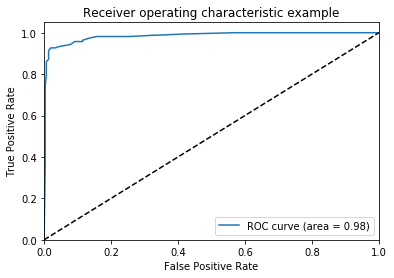

Train: [   0    1    2 ... 4597 4598 4599] Validation: [  14   15   20   42   52   63   70   71   96  105  109  143  144  145
  150  152  153  155  174  183  213  235  243  252  253  269  271  296
  312  317  319  327  333  334  373  377  378  379  391  402  405  410
  412  417  423  431  450  454  461  467  475  489  497  505  519  542
  562  565  591  601  606  609  617  624  626  637  648  651  652  658
  668  677  690  696  704  715  721  728  732  738  753  803  806  811
  814  818  832  837  838  843  869  873  878  884  886  889  897  903
  905  907  915  928  939  944  956  967 1018 1031 1033 1046 1052 1067
 1088 1095 1106 1110 1111 1133 1137 1150 1170 1174 1182 1187 1191 1200
 1202 1207 1214 1251 1254 1295 1303 1306 1311 1312 1324 1337 1345 1350
 1360 1368 1372 1389 1423 1455 1465 1472 1473 1474 1478 1485 1486 1491
 1522 1527 1547 1572 1580 1582 1590 1594 1612 1616 1622 1627 1632 1638
 1639 1640 1667 1679 1693 1694 1700 1706 1712 1722 1738 1741 1756 1762
 1763 1795 1798 1799 1

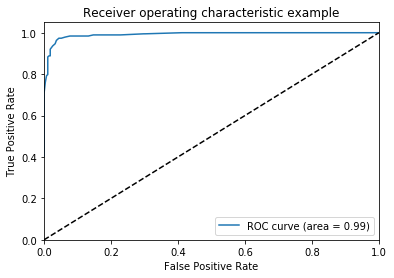

In [6]:
#apply k-fold cross validation
kf = KFold(n_splits=10,shuffle=True, random_state=1) 
scores = []
roc_auc = []
FP=[]
FN=[]
error_rate=[]
for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]
        #train the model using random forest classifier
      classifier = RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=30)
      training=classifier.fit(X_train, y_train)
      scores.append(classifier.score(X_test, y_test))
    #predict using the model created
      prediction=classifier.predict(X_test)
      cm=confusion_matrix(y_test, prediction)
      print(cm)
      
      #TP = cm[0][0]
        #select False positive and False Negatives from confusion matrix
      FP.append(cm[0][1])
      FN.append(cm[1][0])
      #TN = cm[1][1]
      print(FP,FN)
        #compare the predicted and original values of predicition
      ac=accuracy_score(prediction,y_test)
      error_rate.append(1-ac)
      print(ac,error_rate)
      
        
      #roc curve between False positives and True Positive
      fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
      roc_auc = auc(fpr, tpr)
      plt.figure()
      plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")
      plt.show()
      
      
      
      

In [7]:
#print(cm)
print(FN)
print(FP)
print(error_rate)
#FN
FN.append(sum(FN)/10)
FP.append(sum(FP)/10)
#result_table.append(FN,FP,error_rate)
Total = sum(error_rate)/10
error_rate.append(Total)
print(Total)
#error_rate.append(Total)
#result_table.append({'error_rate': Total})

[17, 13, 6, 14, 10, 15, 11, 13, 14, 12]
[10, 8, 4, 9, 9, 8, 10, 6, 4, 7]
[0.05869565217391304, 0.04565217391304344, 0.021739130434782594, 0.050000000000000044, 0.04130434782608694, 0.050000000000000044, 0.04565217391304344, 0.04130434782608694, 0.03913043478260869, 0.04130434782608694]
0.04347826086956521


In [8]:
#append in the table false negative,false positive and error rate ;The last row containing the average.
result_table=pd.DataFrame(np.column_stack([FN,FP,error_rate]),columns=["False Negative","False Positive","error_rate"])

In [9]:
print(result_table)


    False Negative  False Positive  error_rate
0             17.0            10.0    0.058696
1             13.0             8.0    0.045652
2              6.0             4.0    0.021739
3             14.0             9.0    0.050000
4             10.0             9.0    0.041304
5             15.0             8.0    0.050000
6             11.0            10.0    0.045652
7             13.0             6.0    0.041304
8             14.0             4.0    0.039130
9             12.0             7.0    0.041304
10            12.5             7.5    0.043478
